In [55]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pickle
import datetime
import matplotlib.pyplot as plt


import os.path
import fix_yahoo_finance as yf
import pandas as pd

In [56]:
h = 6
endDate = datetime.datetime.now().date()
startDate = datetime.datetime.strptime(str(endDate), u'%Y-%m-%d').date() - datetime.timedelta(days=h)
change = 'Open'
print startDate

2018-12-30


In [103]:
df_historical = pd.read_csv('../notebook/idx/historical/IDX.csv', index_col=[0])
try:
    if change in list(df_historical):
        df = df_historical.rename(columns={change:'Target'})
    else:
        print 'No such a column ' + change + '! Please review your file', 'danger'
        
except pd.errors.EmptyDataError as e:
    print 'No such a column ' + change + '! Please review your file', 'danger'
    

In [115]:
df.tail()

,Target,ds,y
Date,,,
2018-12-28,21.510000,2018-12-28,3.068518
2018-12-31,21.950001,2018-12-31,3.088767
2019-01-02,21.870001,2019-01-02,3.085116
2019-01-03,22.040001,2019-01-03,3.092859
2019-01-04,22.309999,2019-01-04,3.105035


In [116]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [117]:
df = df.filter(['Target'])
df['ds'] = df.index
df['y'] = np.log(df['Target'])
original_end = df['Target'][-1]
df.tail()

,Target,ds,y
ds,,,
2018-12-28,21.510000,2018-12-28,3.068518
2018-12-31,21.950001,2018-12-31,3.088767
2019-01-02,21.870001,2019-01-02,3.085116
2019-01-03,22.040001,2019-01-03,3.092859
2019-01-04,22.309999,2019-01-04,3.105035


In [118]:
model = Prophet(daily_seasonality=True)
model.fit(df)

/home/bepraset/Workspaces/Anaconda/envs/analison/lib/python2.7/site-packages/fbprophet/forecaster.py:253: FutureWarning: 'ds' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  df = df.sort_values('ds')


In [119]:
future = m.make_future_dataframe(periods=31)
forecast = m.predict(future)
    
print (forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())    


             ds      yhat  yhat_lower  yhat_upper
1034 2019-01-31  3.128176    3.088301    3.165158
1035 2019-02-01  3.128041    3.091802    3.164681
1036 2019-02-02  3.154631    3.117359    3.193655
1037 2019-02-03  3.155088    3.117094    3.191991
1038 2019-02-04  3.128376    3.089169    3.167001


In [120]:
df.tail()

,Target,ds,y
ds,,,
2018-12-28,21.510000,2018-12-28,3.068518
2018-12-31,21.950001,2018-12-31,3.088767
2019-01-02,21.870001,2019-01-02,3.085116
2019-01-03,22.040001,2019-01-03,3.092859
2019-01-04,22.309999,2019-01-04,3.105035


In [121]:
viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df['yhat_scaled'] = np.exp(viz_df['yhat'])

close_data = viz_df.Target
forecasted_data = viz_df.yhat_scaled
date = future['ds']
#date = viz_df.index[-plot_num:-1]

In [123]:
viz_df.tail(9)

,Target,ds,y,yhat,yhat_lower,yhat_upper,yhat_scaled
2018-12-21,21.650000,2018-12-21,3.075005,NaN,NaN,NaN,NaN
2018-12-24,21.180000,2018-12-24,3.053057,NaN,NaN,NaN,NaN
2018-12-26,21.190001,2018-12-26,3.053529,NaN,NaN,NaN,NaN
2018-12-27,21.420000,2018-12-27,3.064325,NaN,NaN,NaN,NaN
2018-12-28,21.510000,2018-12-28,3.068518,NaN,NaN,NaN,NaN
2018-12-31,21.950001,2018-12-31,3.088767,NaN,NaN,NaN,NaN
2019-01-02,21.870001,2019-01-02,3.085116,NaN,NaN,NaN,NaN
2019-01-03,22.040001,2019-01-03,3.092859,NaN,NaN,NaN,NaN
2019-01-04,22.309999,2019-01-04,3.105035,NaN,NaN,NaN,NaN


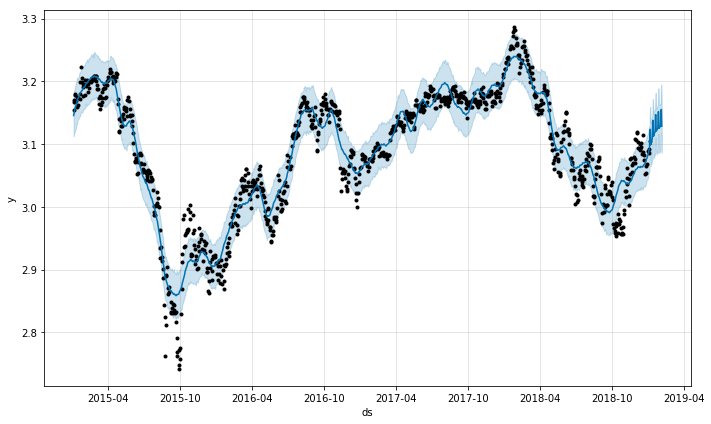

In [94]:
fig1 = m.plot(forecast)

,Target,ds,y,y_hat
Date,,,,
2018-12-28,21.510000,2018-12-28,3.068518,NaN
2018-12-31,21.950001,2018-12-31,3.088767,NaN
2019-01-02,21.870001,2019-01-02,3.085116,NaN
2019-01-03,22.040001,2019-01-03,3.092859,NaN
2019-01-04,22.309999,2019-01-04,3.105035,NaN


In [73]:
viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')

In [74]:
viz_df.tail(31)

,Target,ds,y,yhat,yhat_lower,yhat_upper
2018-11-19,21.709999,2018-11-19,3.077773,NaN,NaN,NaN
2018-11-20,21.230000,2018-11-20,3.055415,NaN,NaN,NaN
2018-11-21,21.459999,2018-11-21,3.066191,NaN,NaN,NaN
2018-11-23,21.540001,2018-11-23,3.069912,NaN,NaN,NaN
2018-11-26,21.760000,2018-11-26,3.080073,NaN,NaN,NaN
2018-11-27,21.680000,2018-11-27,3.076390,NaN,NaN,NaN
2018-11-28,21.540001,2018-11-28,3.069912,NaN,NaN,NaN
2018-11-29,22.379999,2018-11-29,3.108168,NaN,NaN,NaN
2018-11-30,22.340000,2018-11-30,3.106379,NaN,NaN,NaN
2018-12-03,22.600000,2018-12-03,3.117950,NaN,NaN,NaN
